<a href="https://colab.research.google.com/github/KatBCN/Supervisat_Classificacio/blob/main/Sprint_11_PCA_Clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <font color='#d50283'>IT Academy - Data Science Itinerary</font>
## Sprint 11 Task 1 - Clustering
### Assignment by: Kat Weissman

#### General objective:

- Become familiar with clustering algorithms.

#### Python Learning Objectives:
- K Means
- Hierarchical clustering

*Recommended learning resources:*
- https://towardsdatascience.com/the-5-clustering-algorithms-data-scientists-need-to-know-a36d136ef68
- https://realpython.com/k-means-clustering-python/
- https://towardsdatascience.com/pca-using-python-scikit-learn-e653f8989e60
- https://jakevdp.github.io/PythonDataScienceHandbook/05.09-principal-component-analysis.html
- https://towardsdatascience.com/machine-learning-algorithms-part-12-hierarchical-agglomerative-clustering-example-in-python-1e18e0075019
- https://www.analyticsvidhya.com/blog/2019/05/beginners-guide-hierarchical-clustering/


In [ ]:
#Import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.cluster import MiniBatchKMeans
from sklearn.metrics import silhouette_samples, silhouette_score

### Level 1
### Exercise 1 
Group the different flights using the K-means algorithm.

In [ ]:
pd.set_option('display.max_columns', None)  #set display to show all columns

I will load the data which I scaled then performed PCA in different notebooks.

- https://github.com/KatBCN/NoSupervisat_Classificacio/blob/main/Sprint11-Clustering-Sample-PreProcessing%20.ipynb
- https://github.com/KatBCN/NoSupervisat_Classificacio/blob/main/Sprint11-Clustering-PCA.ipynb

Data link:
- https://github.com/KatBCN/NoSupervisat_Classificacio/blob/main/flights-sampled-robustscale-PCA4.csv?raw=true


In [ ]:
# load data
data_link = 'https://github.com/KatBCN/NoSupervisat_Classificacio/blob/main/flights-sampled-robustscale-PCA4.csv?raw=true'
df = pd.read_csv(data_link)

#### Data Exploration

In [ ]:
# Show number of rows and columns in dataframe
df.shape

(96419, 4)

In [ ]:
# Show column names and dtypes
df.dtypes

PC_1    float64
PC_2    float64
PC_3    float64
PC_4    float64
dtype: object

In [ ]:
# Display first 5 rows of dataframe
df.head(5)

,PC_1,PC_2,PC_3,PC_4
0,-1.238091,2.850842,-0.921972,-1.012227
1,-0.922183,-0.549181,0.899407,0.613874
2,-1.294626,-1.472463,-0.382035,0.496146
3,-1.149435,-0.316652,-0.687722,-0.612451
4,-0.947126,-0.554357,0.095276,-0.588490


In [ ]:
# Check for NA values
df.isna().sum()

PC_1    0
PC_2    0
PC_3    0
PC_4    0
dtype: int64

##### K Means Algorithm

- https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html

Default arguments:

class sklearn.cluster.KMeans(n_clusters=8, *, init='k-means++', n_init=10, max_iter=300, tol=0.0001, verbose=0, random_state=None, copy_x=True, algorithm='auto')

I do not know the ideal number of clusters, but will try with 3 clusters, and limit the maximum number of iterations to 10 for the sake of time.

##### K Means Mini Batch Algorithm for Large Datasets

- https://scikit-learn.org/stable/modules/generated/sklearn.cluster.MiniBatchKMeans.html

Default arguments:

class sklearn.cluster.MiniBatchKMeans(n_clusters=8, *, init='k-means++', max_iter=100, batch_size=1024, verbose=0, compute_labels=True, random_state=None, tol=0.0, max_no_improvement=10, init_size=None, n_init=3, reassignment_ratio=0.01)

In [ ]:
X = df.iloc[:, [0,1,2,3]]

I begin by setting k=2. Because I had some trouble with the speed of the algorithm, I decided to use MiniBatchKMeans instead of the original KMeans.

In [ ]:
# define the model
kmeans = MiniBatchKMeans(n_clusters=2,random_state=324)

In [ ]:
# fit the model
kmeans.fit(X)

MiniBatchKMeans(n_clusters=2, random_state=324)

In [ ]:
# assign a cluster to each example
yhat = kmeans.predict(X)

After making predictions for each cluster, I append a column to the dataframe with its cluster assignment.

In [ ]:
# dataframe with clusters 
df['2clusters'] = yhat.tolist()

In [ ]:
df.head()

,PC_1,PC_2,PC_3,PC_4,2clusters
0,-1.238091,2.850842,-0.921972,-1.012227,1
1,-0.922183,-0.549181,0.899407,0.613874,1
2,-1.294626,-1.472463,-0.382035,0.496146,1
3,-1.149435,-0.316652,-0.687722,-0.612451,1
4,-0.947126,-0.554357,0.095276,-0.588490,1


In [ ]:
df['2clusters'].value_counts()

1    73387
0    23032
Name: 2clusters, dtype: int64

When we set k=2, The observations are divided like this:
1. Cluster 1: 24%
2. Cluster 2: 76%

In [ ]:
 df['2clusters'].value_counts(normalize=True)

1    0.761126
0    0.238874
Name: 2clusters, dtype: float64

I will re-run the algorithm with k=4 and append the cluster assignments to the dataframe.

In [ ]:
kmeans = MiniBatchKMeans(n_clusters=4,random_state=324)
kmeans.fit(X)
yhat = kmeans.predict(X)
df['4clusters'] = yhat.tolist()

In [ ]:
df['4clusters'].value_counts()

0    61391
2    19560
1    11183
3     4285
Name: 4clusters, dtype: int64

When we set k=4, The observations are divided like this:
1. Cluster 1: 64%
2. Cluster 2: 12%
3. Cluster 3: 20%
4. Cluster 4: 4%

In [ ]:
df['4clusters'].value_counts(normalize=True)

0    0.636711
2    0.202865
1    0.115983
3    0.044441
Name: 4clusters, dtype: float64

I will save the cluster assignments to a csv file so that I can visualize the clusters in a separate notebook.

In [24]:
df.to_csv('flights-pca-clustered.csv', index=False)

The following code chunk is taken and modified from the website:
- https://medium.com/more-python-less-problems/principal-component-analysis-and-k-means-clustering-to-visualize-a-high-dimensional-dataset-577b2a7a5fe2

Using the elbow plot method, the best number of clusters is in the range of 3 to 8 where the plot curves. The last big drop in inertia (indicating an information gain) occurs at 7.

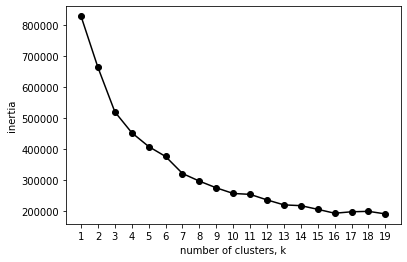

In [ ]:
ks = range(1, 20)
inertias = []
for k in ks:
    # Create a KMeans instance with k clusters: model
    model = MiniBatchKMeans(n_clusters=k,random_state=324)
    
    # Fit model to samples
    model.fit(X)
    
    # Append the inertia to the list of inertias
    inertias.append(model.inertia_)
    
plt.plot(ks, inertias, '-o', color='black')
plt.xlabel('number of clusters, k')
plt.ylabel('inertia')
plt.xticks(ks)
plt.show()

### Level 2
### Exercise 2 
Group the different flights using the hierarchical clustering algorithm.


### Level 3
### Exercise 3 
Calculate clustering performance using a parameter such as silhouette.

The following code was taken and modified from:
- https://scikit-learn.org/stable/auto_examples/cluster/plot_kmeans_silhouette_analysis.html

Based on the elbow plot, I will evaluate the average silhouette score for values in the range of 2 to 7

The average silhouette scores are not great, but 2 clusters and 4 clusters have the highest scores.

In [ ]:
X.head()

,PC_1,PC_2,PC_3,PC_4
0,-1.238091,2.850842,-0.921972,-1.012227
1,-0.922183,-0.549181,0.899407,0.613874
2,-1.294626,-1.472463,-0.382035,0.496146
3,-1.149435,-0.316652,-0.687722,-0.612451
4,-0.947126,-0.554357,0.095276,-0.588490


In [ ]:
range_n_clusters = [2, 3, 4, 5, 6, 7]

for n_clusters in range_n_clusters:
    # Initialize the clusterer with n_clusters value and a random generator
    # seed of 324 for reproducibility.
    clusterer = MiniBatchKMeans(n_clusters=n_clusters, random_state=324)
    cluster_labels = clusterer.fit_predict(X)

    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed
    # clusters
    silhouette_avg = silhouette_score(X, cluster_labels)
    print(
        "For n_clusters =",
        n_clusters,
        "The average silhouette_score is :",
        silhouette_avg,
    )

For n_clusters = 2 The average silhouette_score is : 0.4014795003689444
For n_clusters = 3 The average silhouette_score is : 0.3371956915453362
For n_clusters = 4 The average silhouette_score is : 0.35823909020817024
For n_clusters = 5 The average silhouette_score is : 0.30541301229687146
For n_clusters = 6 The average silhouette_score is : 0.2949573458353219
For n_clusters = 7 The average silhouette_score is : 0.3357883801978272
